# Project 7
### Carter Smith
[Project Repository](https://github.com/cartertrumansmith/datafun-07-ml)

In [3]:
#Import statements
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import statistics as stats
import matplotlib.pyplot as plt
import pyarrow

## Part 1 - Chart a Straight Line
Using Pandas data frames to plot a linear relationship, in this case the conversion between Celsius and Fahrenheit temperatures.
The function to be plotted is:
$$
  c = \frac{5}{9}(f-32)
$$

In [4]:
#Using lambda expressions for the function, from Chapter 10.16, Page 416
c = lambda f: 5/9 * (f-32)
temps = [(f,c(f)) for f in range(0,101,10)] #record function values from 0 to 101 in 10 degree increments.

#### Using pandas to plot the function

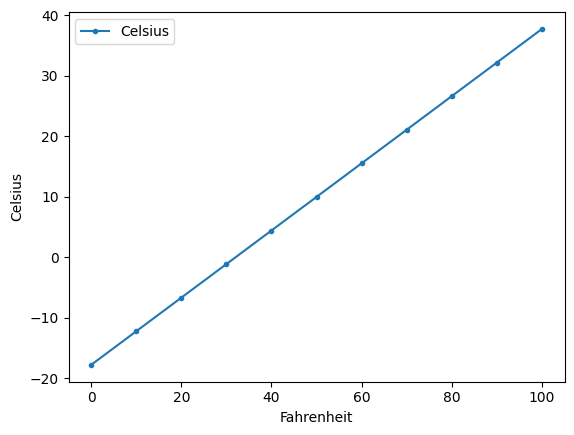

In [8]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit','Celsius'])
axes = temps_df.plot(x='Fahrenheit',y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')